In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set(rc={"figure.figsize":(11.7,8.27)})

In [3]:
data_in= pd.read_csv("C:\\Users\\User\\desktop\\cars_sampled.csv", na_values=[' ?'])

In [4]:
cars=data_in.copy()

In [5]:
cars.info

<bound method DataFrame.info of             dateCrawled                                               name  \
0      30/03/2016 13:51                                       Zu_verkaufen   
1         7/3/2016 9:54                             Volvo_XC90_2.4D_Summum   
2         1/4/2016 0:57                                  Volkswagen_Touran   
3      19/03/2016 17:50                       Seat_Ibiza_1.4_16V_Reference   
4      16/03/2016 14:51  Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...   
...                 ...                                                ...   
49996    3/4/2016 15:48                               Suche_VW_T5_Multivan   
49997  27/03/2016 14:55  Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60   
49998  14/03/2016 18:51  [SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...   
49999  15/03/2016 18:06        Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten   
50000   22/03/2016 9:54                    Chevrolet_Matiz_1.Hd_TÜV11/2017   

           seller offerType  pr

In [6]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [7]:
pd.set_option('display.float_format',lambda x:'%.3f'%x)
pd.set_option('display.max_columns',500)
cars.describe()


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [8]:
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col,axis=1)

In [9]:
cars.drop_duplicates(keep='first',inplace=True)

In [10]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

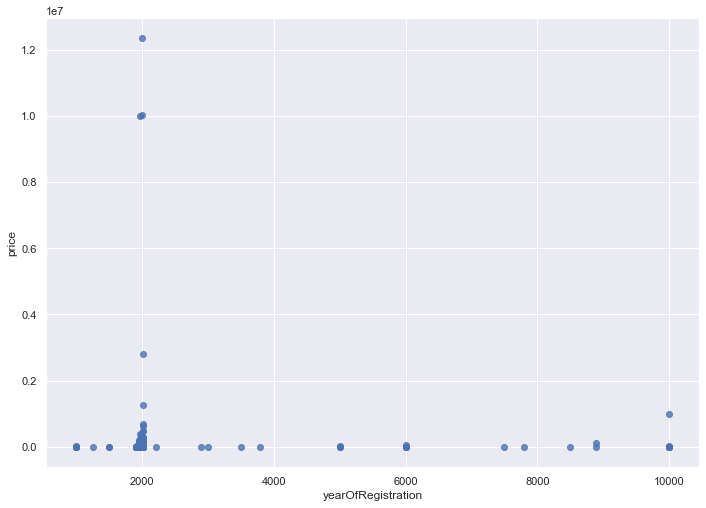

In [11]:
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration']<2018)
sum(cars['yearOfRegistration']>1950)
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False,data=cars)

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

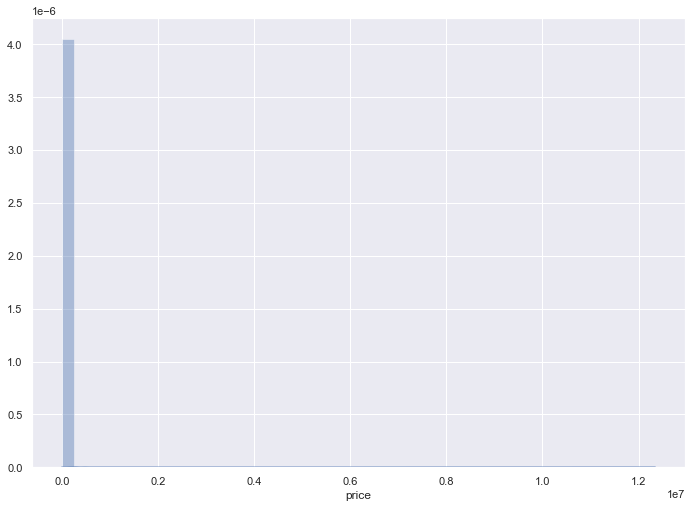

In [12]:
price_count=cars['price'].value_counts().sort_index()
sns.distplot(cars['price'])
cars['price'].describe()

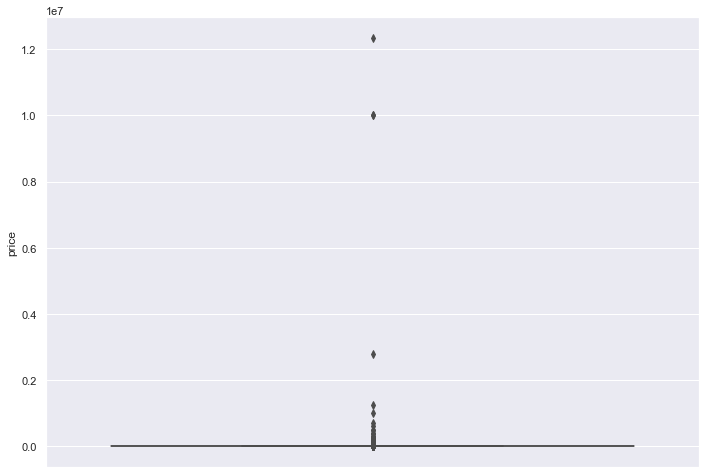

In [13]:
sns.boxplot(y=cars['price'])

In [14]:
sum(cars['price']<100)

1748

In [15]:
cars=cars[(cars.yearOfRegistration<=2018)&
         (cars.yearOfRegistration>=1950)&
         (cars.price>=100)&
         (cars.price<=150000)&
         (cars.powerPS>=10)&
         (cars.powerPS<=500)]

In [16]:
cars['monthOfRegistration']/=12
cars['monthOfRegistration']

0       0.250
1       0.500
2       0.917
3       1.000
4       0.917
         ... 
49991   0.667
49992   0.750
49993   0.667
49995   0.250
50000   0.833
Name: monthOfRegistration, Length: 42772, dtype: float64

In [17]:
cars['Age']=(2021-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       17.873
std         7.093
min         3.000
25%        13.330
50%        17.830
75%        22.170
max        70.750
Name: Age, dtype: float64

In [18]:
 cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'],axis=1)

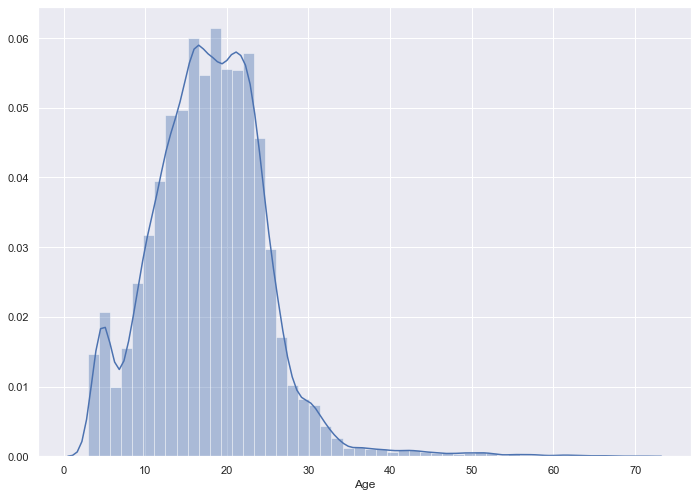

In [19]:
sns.distplot(cars['Age'])

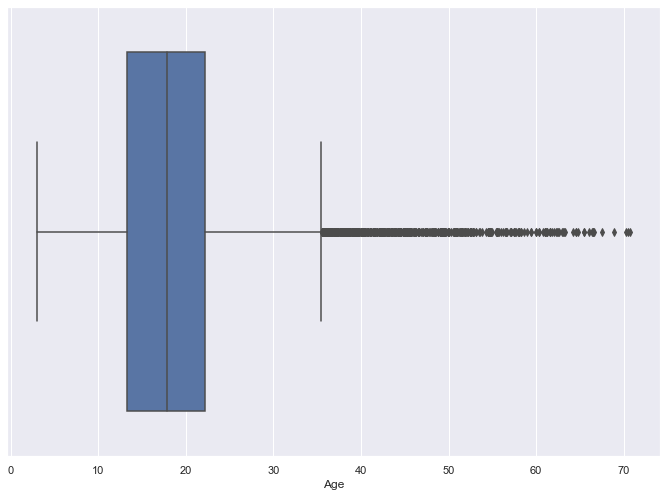

In [20]:
sns.boxplot(cars['Age'])

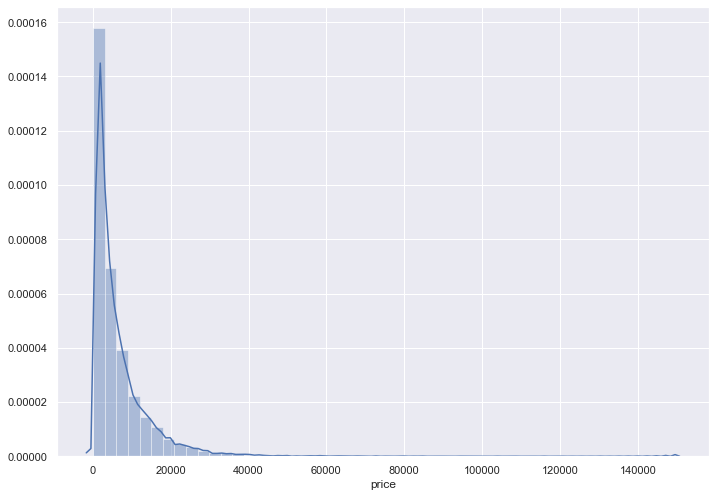

In [21]:
sns.distplot(cars['price'])

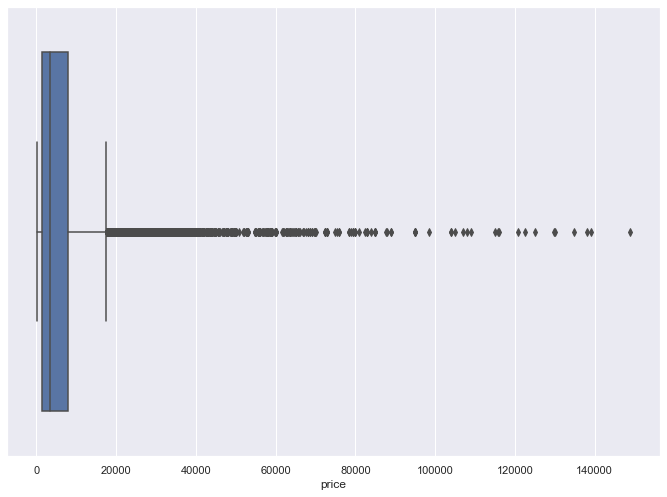

In [22]:
sns.boxplot(cars['price'])

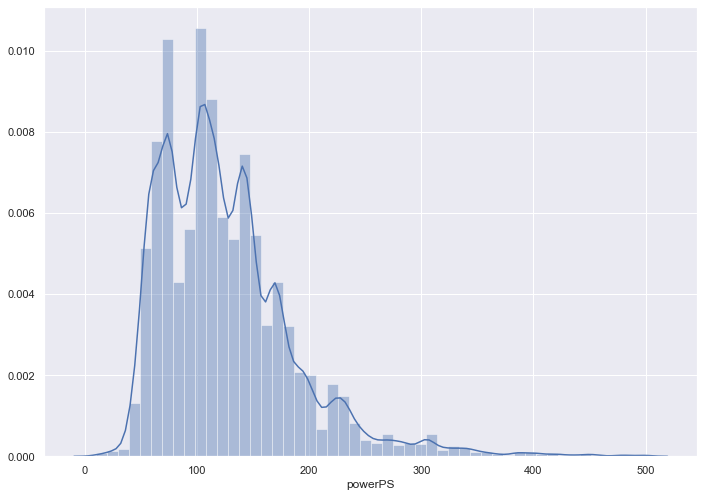

In [23]:
sns.distplot(cars['powerPS'])

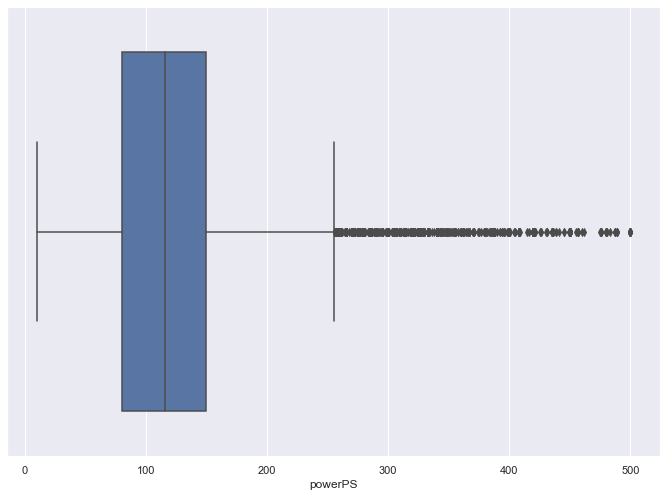

In [24]:
sns.boxplot(cars['powerPS'])

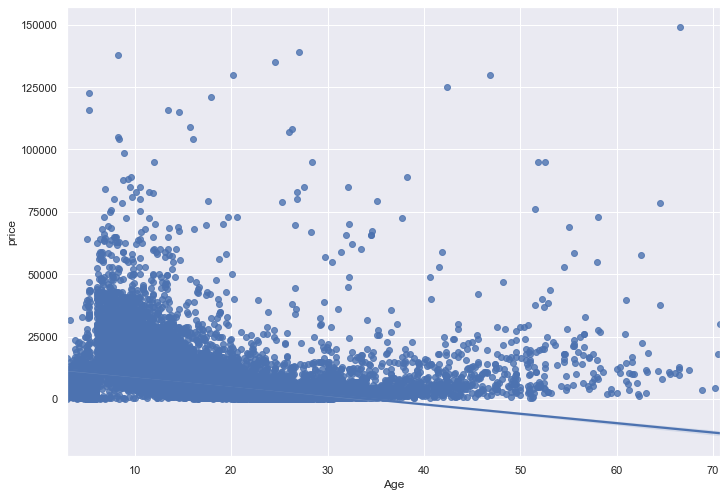

In [25]:
sns.regplot(x='Age',y='price',scatter=True,data=cars)

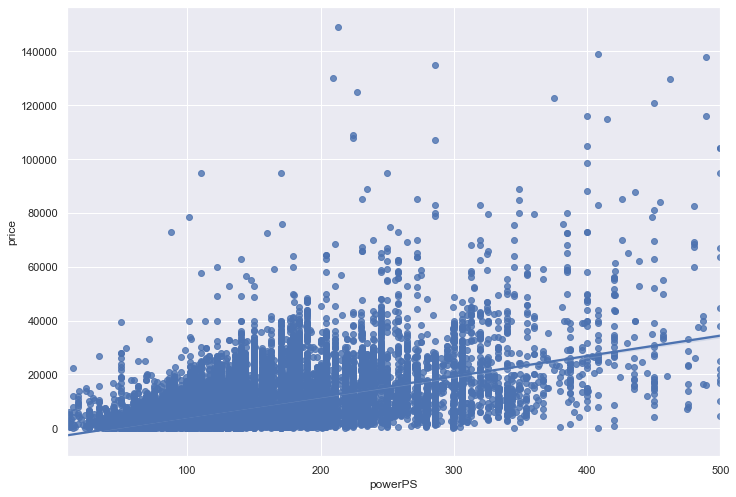

In [26]:
sns.regplot(x='powerPS',y='price',scatter=True,data=cars)

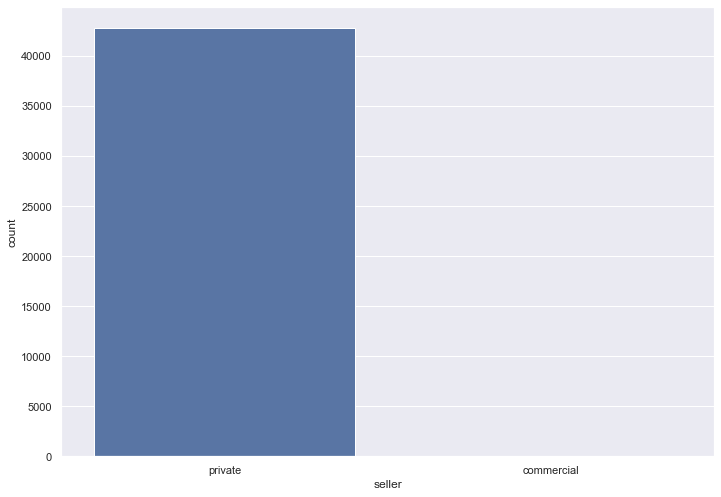

In [27]:
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count',normalize=True)
sns.countplot(x='seller',data=cars)

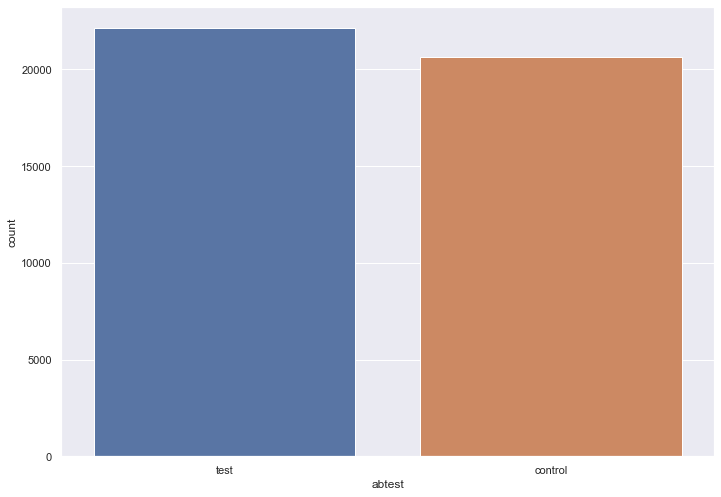

In [28]:
cars['abtest'].value_counts()
pd.crosstab(cars['abtest'],columns='count',normalize=True)
sns.countplot(x='abtest',data=cars)

In [29]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

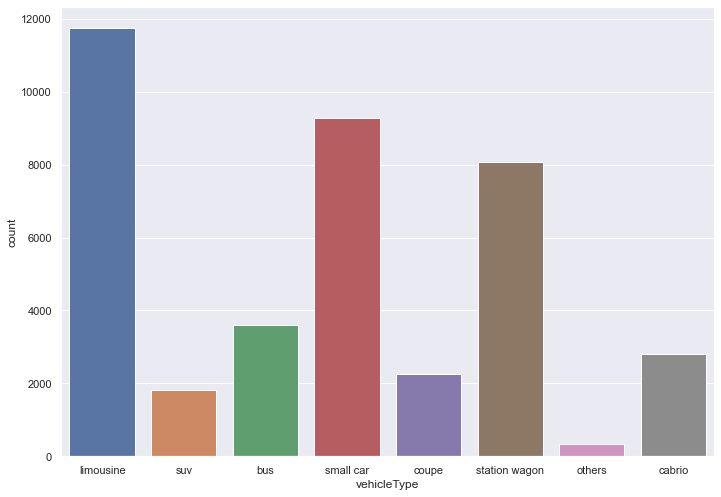

In [30]:
sns.countplot(x='vehicleType',data=cars)

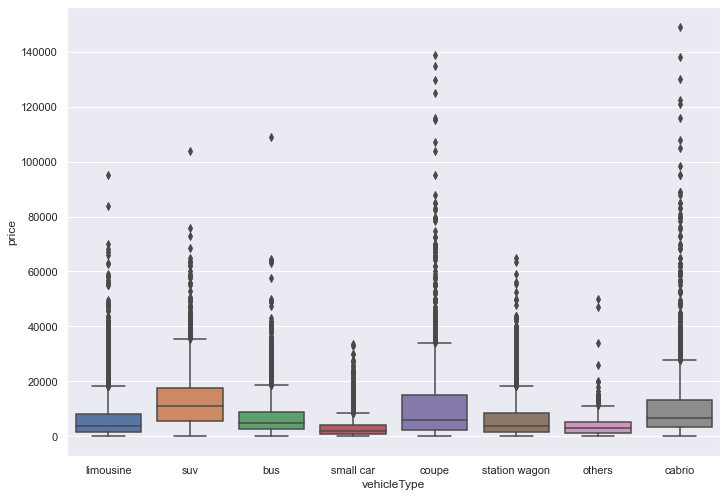

In [31]:
sns.boxplot(x='vehicleType',y='price',data=cars)

In [32]:
cars['gearbox'].value_counts(
)

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [33]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


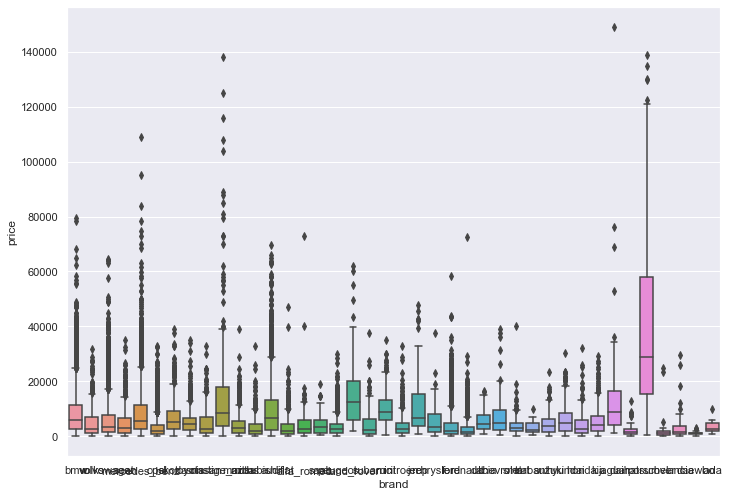

In [34]:
sns.boxplot(x='brand',y='price',data=cars)

In [35]:
cols=['seller','offerType','abtest']

In [36]:
cars=cars.drop(columns=cols,axis=1)
cars

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,NaN,18.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,16.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,NaN,18.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,16.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,13.920
...,...,...,...,...,...,...,...,...,...,...
49991,10900,limousine,manual,231,x_reihe,150000,petrol,bmw,no,17.670
49992,790,limousine,manual,82,astra,150000,diesel,opel,no,23.750
49993,830,small car,manual,60,clio,125000,petrol,renault,no,22.670
49995,2290,station wagon,manual,101,astra,150000,petrol,opel,no,20.250


In [37]:
cars_copy=cars.copy()

In [38]:
cars_select=cars.select_dtypes(exclude=[object])
correlation=cars_select.corr()

In [39]:
round(correlation,3)
cars_select.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [40]:
cars_omit=cars.dropna(axis=0)
cars_omit.shape

(32884, 10)

In [41]:
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [43]:
x1=cars_omit.drop(['price'],axis='columns',inplace=False)
y1=cars_omit['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266269E9D60>,
      dtype=object)

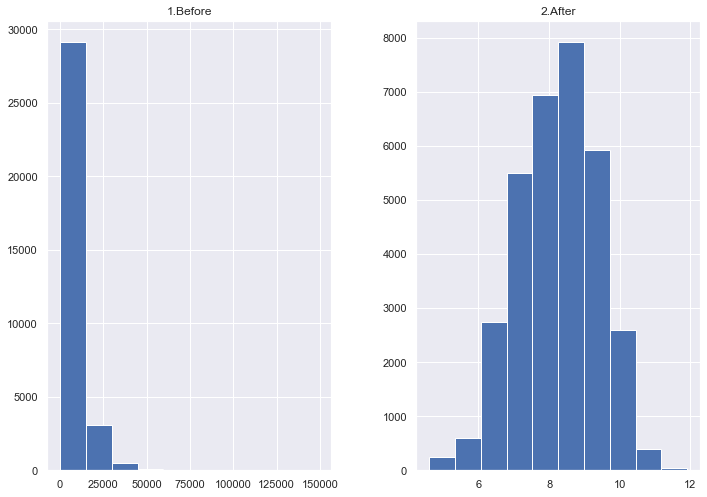

In [44]:
prices=pd.DataFrame({"1.Before":y1,"2.After":np.log(y1)})
prices.hist()

In [45]:
y1=np.log(y1)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [47]:
base_pred=np.mean(y_test)
print(base_pred)


8.249615787653337


In [48]:
base_pred=np.repeat(base_pred,len(y_test))

In [49]:
base_root_mean_square_error=np.sqrt(mean_squared_error(y_test,base_pred))

In [50]:
print(base_root_mean_square_error)
base_pred.shape

1.1274483657478247


(9866,)

In [51]:
lgr=LinearRegression(fit_intercept=True)

In [52]:
model_list=lgr.fit(x_train,y_train)

In [53]:
cars_prediction_lin1=lgr.predict(x_test)
cars_prediction_lin1.shape,y_test.shape

((9866,), (9866,))

In [54]:
lin_mse1=np.sqrt(mean_squared_error(y_test,cars_prediction_lin1))

In [55]:
lin_mse1

0.5455481266513857

In [56]:
model_list.score(x_train,y_train),model_list.score(x_test,y_test)

(0.7800936978183914, 0.7658615091649229)

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

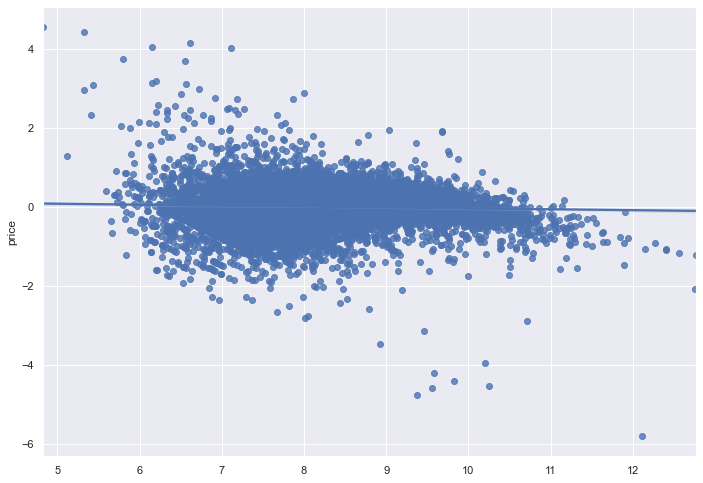

In [57]:
residuals1=y_test-cars_prediction_lin1
sns.regplot(x=cars_prediction_lin1,y=residuals1, scatter=True)
residuals1.describe()

In [ ]:
# # Rainforest Method


In [60]:
rf=RandomForestRegressor(n_estimators=100, max_features='auto',
                        max_depth=100,min_samples_split=10,
                        min_samples_leaf=4,random_state=1)

In [61]:
model_rf1=rf.fit(x_train,y_train)

In [62]:
cars_predct_rf1=rf.predict(x_test)

In [64]:
np.sqrt(mean_squared_error(y_test,cars_predct_rf1))

0.436073731962631

In [65]:
model_rf1.score(x_test,y_test),model_rf1.score(x_train,y_train)

(0.8504017440877063, 0.9202493544658312)

In [70]:
cars_impute=cars.apply(lambda x:x.fillna(x.median())
                      if x.dtype=='float' 
                      else x.fillna(x.value_counts().index[0]))
cars_impute.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [71]:
cars_impute=pd.get_dummies(cars_impute,drop_first=True)

In [74]:
x2=cars_impute.drop(['price'], axis='columns', inplace=False)
y2=cars_impute['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026623690D00>,
      dtype=object)

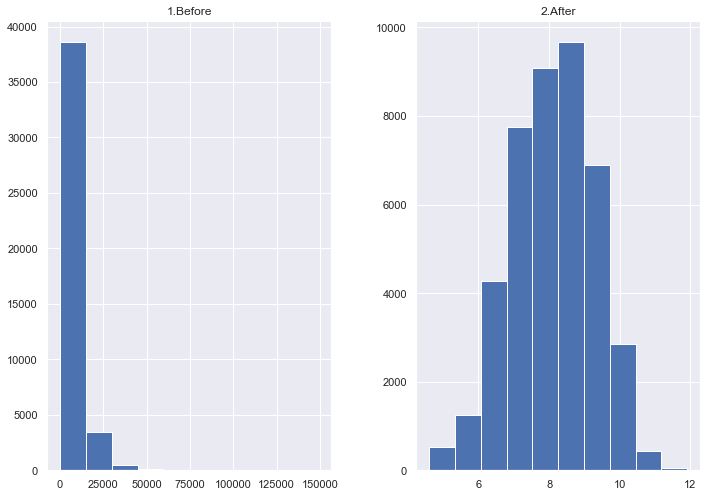

In [78]:
prices=pd.DataFrame({"1.Before":y2,'2.After':np.log(y2)})
prices.hist()

In [79]:
y2=np.log(y2)

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3,random_state=3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


In [81]:
base_pred=np.mean(y_test)
print(base_pred)
base_pred=np.repeat(base_pred,len(y_test))
base_root_mean_square_error=np.sqrt(mean_squared_error(y_test,base_pred))
print(base_root_mean_square_error)


8.068391740519193
1.1884349112889792


In [83]:
model_list=lgr.fit(x_train,y_train)
cars_prediction_lin1=lgr.predict(x_test)
lin_mse1=np.sqrt(mean_squared_error(y_test,cars_prediction_lin1))
print(lin_mse1)
model_list.score(x_train,y_train),model_list.score(x_test,y_test)

0.6483956449231301


(0.7071658736894363, 0.702333900863118)

In [84]:
rf=RandomForestRegressor(n_estimators=100, max_features='auto',
                        max_depth=100,min_samples_split=10,
                        min_samples_leaf=4,random_state=1)

In [85]:
model_rf1=rf.fit(x_train,y_train)

In [86]:
cars_predct_rf1=rf.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,cars_predct_rf1)))
model_rf1.score(x_test,y_test),model_rf1.score(x_train,y_train)

0.4943163129200072


(0.8269948292290515, 0.9024282979688567)